In [134]:
#import dependencies and set-up
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
from scipy.stats import linregress
import scipy.stats as st
import matplotlib as mpl
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
%matplotlib inline

In [135]:
data_path = "Resources/movies.csv"

movie_df = pd.read_csv(data_path)
movie_df

,imdb_title_id,original_title,year,genre,duration,language,production_company,avg_vote,votes,budget,Good_or_Bad_Movie
0,tt7939428,10 Things We Should Do Before We Break Up,2020,Romance,74,English,NaN,4.7,486,25000000,0
1,tt10740584,Abigail Haunting,2020,Horror,85,English,Indie Film Factory,3.8,398,60000,0
2,tt11032990,Malibu Rescue: The Next Wave,2020,"Action, Adventure, Comedy",68,English,Pacific Bay Entertainment,4.5,386,5000000,0
3,tt8461224,The Tax Collector,2020,"Action, Crime, Drama",95,English,Cedar Park Entertainment,4.7,4862,30000000,0
4,tt11547496,Camp Blood 8: Revelations,2020,Horror,82,English,Sterling Entertainment,2.2,114,10000,0
...,...,...,...,...,...,...,...,...,...,...,...
10340,tt0004465,The Perils of Pauline,1914,"Action, Adventure, Drama",199,English,PathÃ© FrÃ¨res,6.3,939,25000,0
10341,tt0004181,Judith of Bethulia,1914,Drama,61,English,Biograph Company,6.1,1239,40000,0
10342,tt0004099,"His Majesty, the Scarecrow of Oz",1914,"Family, Fantasy, Adventure",59,English,The Oz Film Manufacturing Company,5.2,415,23500,0
10343,tt0003471,Traffic in Souls,1913,"Crime, Drama",88,English,Independent Moving Pictures Co. of America (IMP),6.0,552,5700,0


In [136]:
movie_df["genre"]= movie_df["genre"].str.split(',', expand=True)
movie_df

,imdb_title_id,original_title,year,genre,duration,language,production_company,avg_vote,votes,budget,Good_or_Bad_Movie
0,tt7939428,10 Things We Should Do Before We Break Up,2020,Romance,74,English,NaN,4.7,486,25000000,0
1,tt10740584,Abigail Haunting,2020,Horror,85,English,Indie Film Factory,3.8,398,60000,0
2,tt11032990,Malibu Rescue: The Next Wave,2020,Action,68,English,Pacific Bay Entertainment,4.5,386,5000000,0
3,tt8461224,The Tax Collector,2020,Action,95,English,Cedar Park Entertainment,4.7,4862,30000000,0
4,tt11547496,Camp Blood 8: Revelations,2020,Horror,82,English,Sterling Entertainment,2.2,114,10000,0
...,...,...,...,...,...,...,...,...,...,...,...
10340,tt0004465,The Perils of Pauline,1914,Action,199,English,PathÃ© FrÃ¨res,6.3,939,25000,0
10341,tt0004181,Judith of Bethulia,1914,Drama,61,English,Biograph Company,6.1,1239,40000,0
10342,tt0004099,"His Majesty, the Scarecrow of Oz",1914,Family,59,English,The Oz Film Manufacturing Company,5.2,415,23500,0
10343,tt0003471,Traffic in Souls,1913,Crime,88,English,Independent Moving Pictures Co. of America (IMP),6.0,552,5700,0


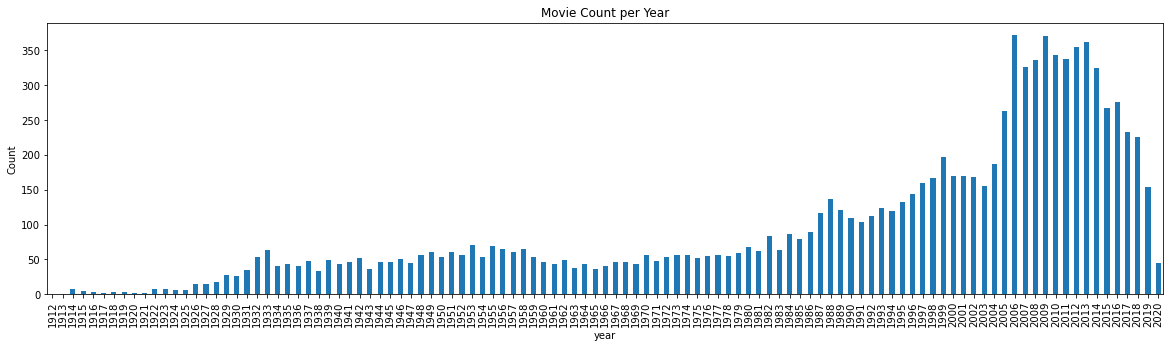

In [137]:
year_gb = movie_df.groupby(["year"])
movie_count = year_gb.count()["original_title"]
movie_count_chart= movie_count.plot(kind= "bar", figsize=(20,5))
plt.title("Movie Count per Year")
movie_count_chart.set_ylabel("Count")
plt.show()

In [138]:
good_movies_per_year = year_gb.sum()["Good_or_Bad_Movie"]
good_movies_per_year

year
1912     0
1913     0
1914     0
1915     0
1916     1
        ..
2016    27
2017    27
2018    36
2019    24
2020     2
Name: Good_or_Bad_Movie, Length: 109, dtype: int64

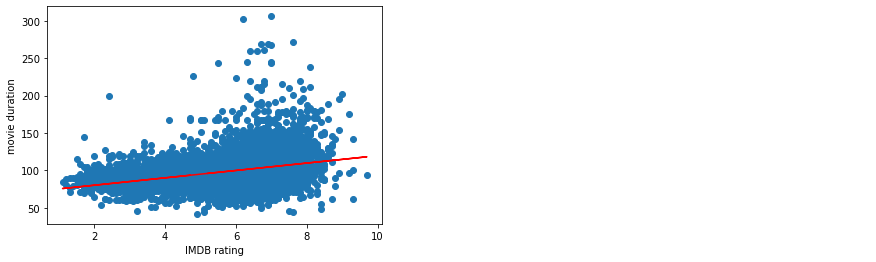

In [139]:
IMDB =movie_df["avg_vote"]
duration = movie_df["duration"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(IMDB, duration)
regress_values = IMDB * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(IMDB, duration)

plt.plot(IMDB,regress_values,"r-")
plt.annotate(line_eq,(20,100),fontsize=15,color="red")
plt.xlabel('IMDB rating')
plt.ylabel('movie duration')
plt.show()

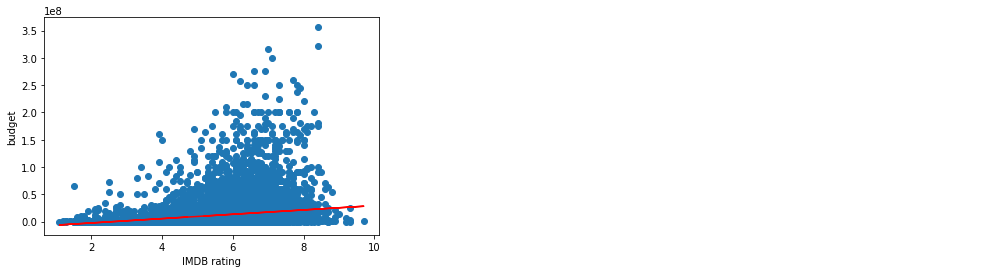

In [140]:
IMDB =movie_df["avg_vote"]
budget = movie_df["budget"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(IMDB, budget)
regress_values = IMDB * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(IMDB, budget)

plt.plot(IMDB,regress_values,"r-")
plt.annotate(line_eq,(20,100),fontsize=15,color="red")
plt.xlabel('IMDB rating')
plt.ylabel('budget')
plt.show()

In [141]:
budget_bins = [9999,99999,999999,9999999,99999999,999999999]
budget_range = ["<100K","100K-1M","1M-10M","10M-100M","100M-1B"]
budget_df = movie_df.loc[:,["avg_vote","budget", "original_title", "duration"]].drop_duplicates()
budget_df["budget_cut"]=pd.cut(budgets_df["budget"], budget_bins, labels = budget_range)

budget_df_gb = budget_df.groupby("budget_cut")
avg_imdb_score = budget_df_gb["avg_vote"].mean()


In [142]:
budget_count = budget_df["budget_cut"].value_counts()

In [143]:
budget_count_df = pd.DataFrame({"Total Count":budget_count, "avg_score": avg_imdb_score })
budget_count_df.sort_index()

,Total Count,avg_score
<100K,929,4.736168
100K-1M,2468,5.503201
1M-10M,3839,5.778302
10M-100M,2694,6.164514
100M-1B,218,6.633486


In [144]:
#budget_count_df["avg_imdb_score"]
#budget_count
avg_imdb_score

budget_cut
<100K       4.736168
100K-1M     5.503201
1M-10M      5.778302
10M-100M    6.164514
100M-1B     6.633486
Name: avg_vote, dtype: float64

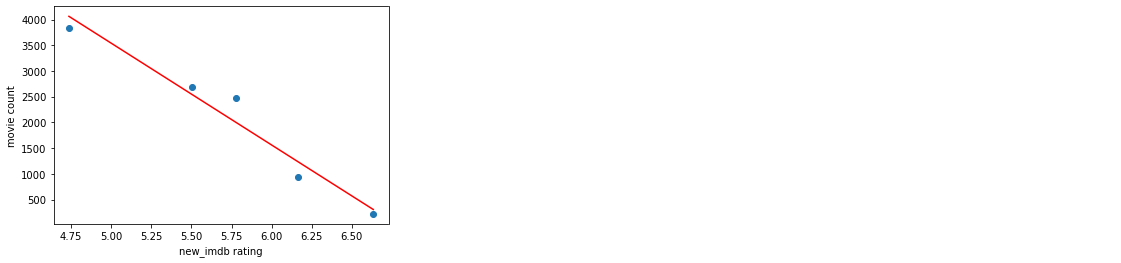

In [145]:
new_imdb = avg_imdb_score
new_budget = budget_count
(slope, intercept, rvalue, pvalue, stderr) = linregress(new_imdb, new_budget)
regress_values = new_imdb * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(new_imdb, new_budget)

plt.plot(new_imdb,regress_values,"r-")
plt.annotate(line_eq,(10,100),fontsize=15,color="red")
plt.xlabel('new_imdb rating')
plt.ylabel('movie count')
plt.show()

In [146]:
budget_df["budget_cut"]

0        10M-100M
1           <100K
2          1M-10M
3        10M-100M
4           <100K
           ...   
10340       <100K
10341       <100K
10342       <100K
10343         NaN
10344       <100K
Name: budget_cut, Length: 10345, dtype: category
Categories (5, object): [<100K < 100K-1M < 1M-10M < 10M-100M < 100M-1B]

In [147]:
#####Genre######

In [148]:
unique_genre = len(movie_df["genre"].unique())
print("number of unique genre:", unique_genre)

number of unique genre: 22


In [149]:
genre_list = movie_df["genre"].unique()
genre_list

array(['Romance', 'Horror', 'Action', 'Sci-Fi', 'Comedy', 'Drama',
       'Crime', 'Thriller', 'Biography', 'Adventure', 'Western',
       'Animation', 'Fantasy', 'Family', 'Mystery', 'Music', 'Musical',
       'Sport', 'Documentary', 'War', 'History', 'Film-Noir'],
      dtype=object)

In [150]:
genre_gb = movie_df.groupby(["genre", "avg_vote","duration"]).size().reset_index().rename(columns={0:'count'})
genre_gb_df = genre_gb.reset_index()
genre_gb_df

,index,genre,avg_vote,duration,count
0,0,Action,1.2,80,1
1,1,Action,1.3,71,1
2,2,Action,1.4,90,1
3,3,Action,1.5,87,1
4,4,Action,1.5,90,1
...,...,...,...,...,...
7066,7066,Western,7.3,92,1
7067,7067,Western,7.3,96,1
7068,7068,Western,7.3,104,1
7069,7069,Western,7.4,111,1


In [151]:
genre_avg_imdb_df = movie_df.groupby(["genre"])["avg_vote"].mean()
genre_avg_imdb_df.head(20) 
#avg_imdb = genre_gb2(["avg_vote"]).mean()
#avg_imdb

genre
Action         5.527679
Adventure      5.993293
Animation      6.453138
Biography      6.779866
Comedy         5.778223
Crime          6.158747
Documentary    7.500000
Drama          6.114233
Family         4.969048
Fantasy        5.211392
Film-Noir      7.280000
History        6.571429
Horror         4.362098
Music          6.600000
Musical        6.257143
Mystery        5.920000
Romance        5.789091
Sci-Fi         4.240000
Sport          6.550000
Thriller       4.510000
Name: avg_vote, dtype: float64

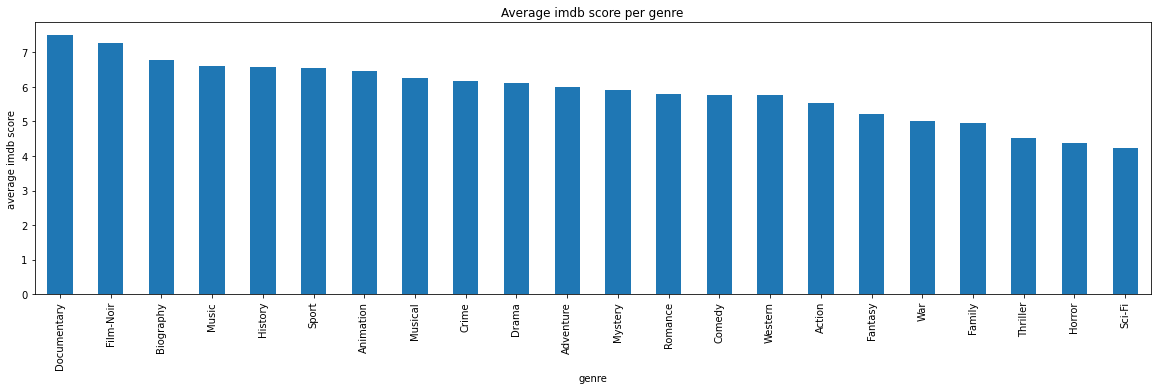

In [152]:
genre_bar_chart = genre_avg_imdb_df.sort_values(ascending=False).plot(kind = "bar", figsize= (20,5))
plt.title("Average imdb score per genre")
plt.ylabel('average imdb score');
plt.show()

In [160]:
budget_bins = [9999,99999,999999,9999999,99999999,999999999]
budget_range = ["<100K","100K-1M","1M-10M","10M-100M","100M-1B"]
budget_df2 = movie_df.loc[:,["avg_vote","budget", "original_title", "duration","genre"]].drop_duplicates()
budget_df2["budget_cut"]=pd.cut(budgets_df["budget"], budget_bins, labels = budget_range)

budget_df2

,avg_vote,budget,original_title,duration,genre,budget_cut
0,4.7,25000000,10 Things We Should Do Before We Break Up,74,Romance,10M-100M
1,3.8,60000,Abigail Haunting,85,Horror,<100K
2,4.5,5000000,Malibu Rescue: The Next Wave,68,Action,1M-10M
3,4.7,30000000,The Tax Collector,95,Action,10M-100M
4,2.2,10000,Camp Blood 8: Revelations,82,Horror,<100K
...,...,...,...,...,...,...
10340,6.3,25000,The Perils of Pauline,199,Action,<100K
10341,6.1,40000,Judith of Bethulia,61,Drama,<100K
10342,5.2,23500,"His Majesty, the Scarecrow of Oz",59,Family,<100K
10343,6.0,5700,Traffic in Souls,88,Crime,NaN


In [162]:
test1 = budget_df2.groupby(["genre"])
test2 = test1["budget_cut"].value_counts()
test2

genre    budget_cut
Action   10M-100M      618
         1M-10M        600
         100K-1M       294
         100M-1B       125
         <100K          93
                      ... 
War      100K-1M         2
Western  1M-10M         43
         100K-1M        35
         <100K          10
         10M-100M        2
Name: budget_cut, Length: 83, dtype: int64

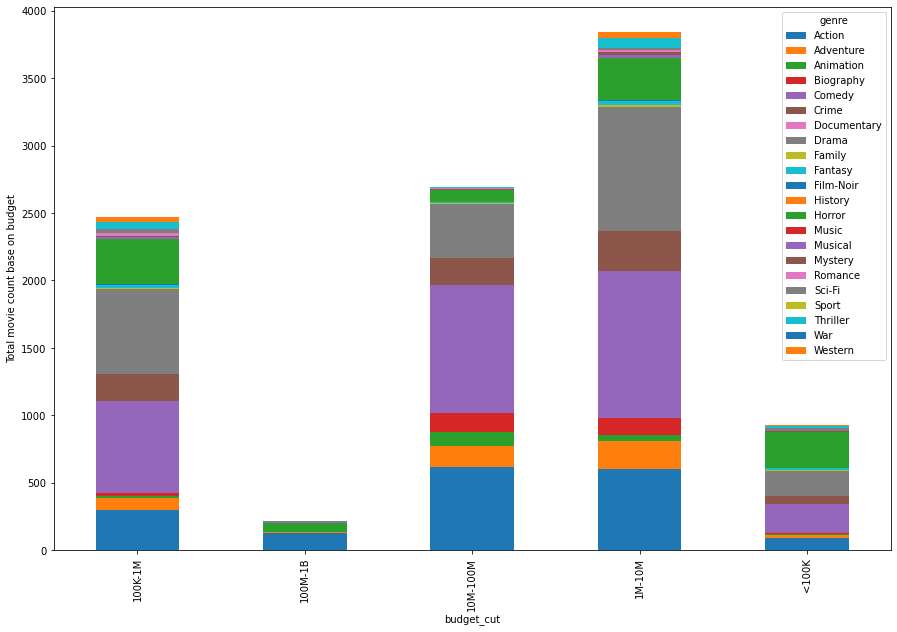

In [166]:
test2.unstack(0).plot.bar(stacked=True, figsize=(15,10))
plt.ylabel('Total movie count base on budget');
plt.show()

In [163]:
test3 = budget_df2.groupby(["budget_cut"])
test4 = test3["genre"].value_counts()
test4

budget_cut  genre    
<100K       Horror       264
            Comedy       217
            Drama        191
            Action        93
            Crime         57
                        ... 
100M-1B     Comedy         7
            Drama          6
            Biography      3
            Crime          1
            Family         1
Name: genre, Length: 83, dtype: int64

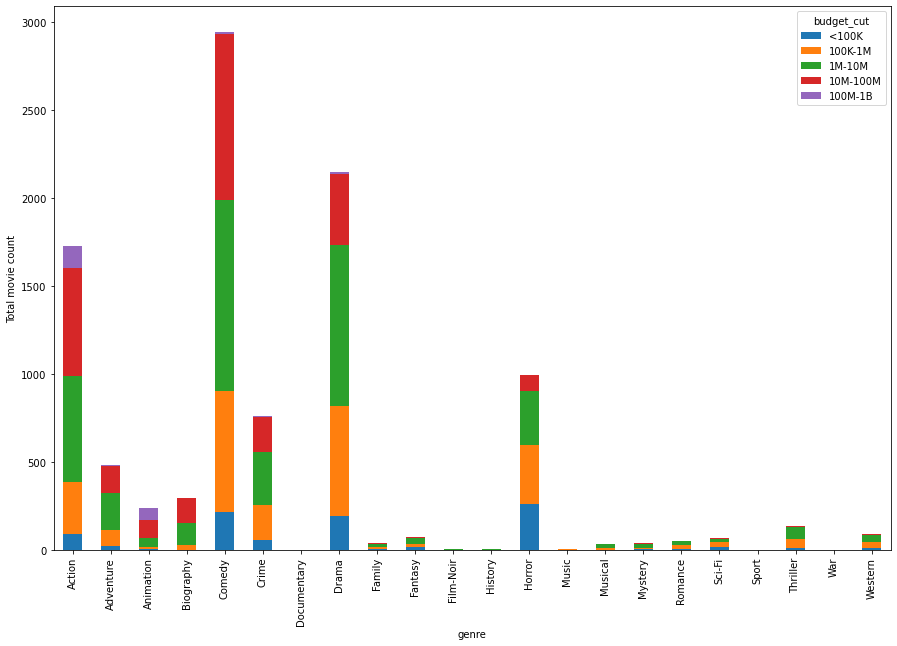

In [165]:
test4.unstack(0).plot.bar(stacked=True, figsize=(15,10))
plt.ylabel('Total movie count based on Genre');
plt.show()

In [ ]:
selected_genre = 

In [ ]:
########dont use yet)
budget_df_gb2 = budget_df2.groupby(["genre"])
avg_imdb_score2 = budget_df_gb["avg_vote"].mean()
genre_count= budget_df2["genre"].value_counts()
budget_count2 = budget_df["budget_cut"].value_counts()

In [158]:
genre_count

Comedy         2994
Drama          2178
Action         1745
Horror         1058
Crime           766
Adventure       492
Biography       298
Animation       239
Thriller        140
Western          90
Fantasy          79
Sci-Fi           70
Romance          55
Family           42
Mystery          40
Musical          35
History           7
Music             7
Film-Noir         5
Sport             2
War               2
Documentary       1
Name: genre, dtype: int64

In [ ]:
###########Summary Stats#################